## Twitter Sentiment Analysis 


### Overview

This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

### Importing required libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
 
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
import spacy
nlp = spacy.load("en_core_web_sm")

### DataSet loading 

In [13]:
df = pd.read_csv('twitter_training.csv' , names = ['id','brand','emotion','tweet'])
df.head()

,id,brand,emotion,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [14]:
# check infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74682 non-null  int64 
 1   brand    74682 non-null  object
 2   emotion  74682 non-null  object
 3   tweet    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### Prepocessing dataset

In [15]:
# check nulls percentage

(df.isna().sum()  / df.shape[0] ) * 100

id         0.000000
brand      0.000000
emotion    0.000000
tweet      0.918561
dtype: float64

**Since nulls are only 1% in tweet column we can drop these rows**

In [16]:
df.dropna(inplace=True)

In [17]:
# drop duplicates

(df[df.duplicated()].count() / df.shape[0] ) * 100

id         3.162333
brand      3.162333
emotion    3.162333
tweet      3.162333
dtype: float64

**There are around 3% duplicates we can drop these as well.**

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.head()

,id,brand,emotion,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [20]:
df['emotion'].value_counts()

emotion
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

In [ ]:
# Basic preprocessing

# 1. Remove Stop Words
# 2. Lowercasing
# 3. Lemmitizing the words
# 4. Tokenize the tweet for modelling 

###  Preprocessing function to remove stop words and lemmatize the text

In [ ]:
def preprocess(text):
    # remove stop words and lemmatize the text and make it lower case
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_.lower())
    
    return " ".join(filtered_tokens) 

In [31]:
df['tweet'] = df['tweet'].apply(preprocess)

In [33]:
df['tweet'][0]

'm get borderland murder'

In [78]:
df.head()

,id,brand,emotion,tweet
0,2401,Borderlands,Positive,m get borderland murder
1,2401,Borderlands,Positive,come border kill
2,2401,Borderlands,Positive,m get borderland kill
3,2401,Borderlands,Positive,m come borderland murder
4,2401,Borderlands,Positive,m get borderland 2 murder


#

## Exploratory Data Analysis

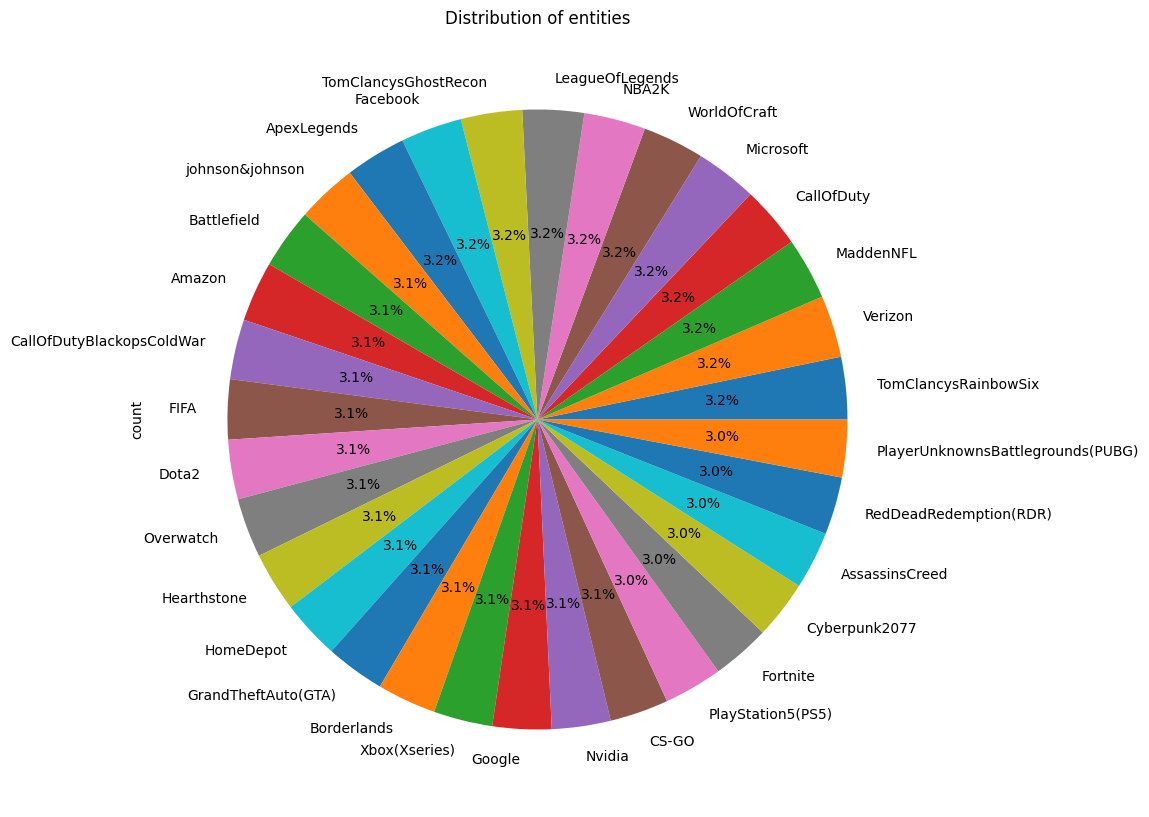

In [79]:
entity_content=df['brand'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of entities')

plt.show()

<Axes: xlabel='emotion'>

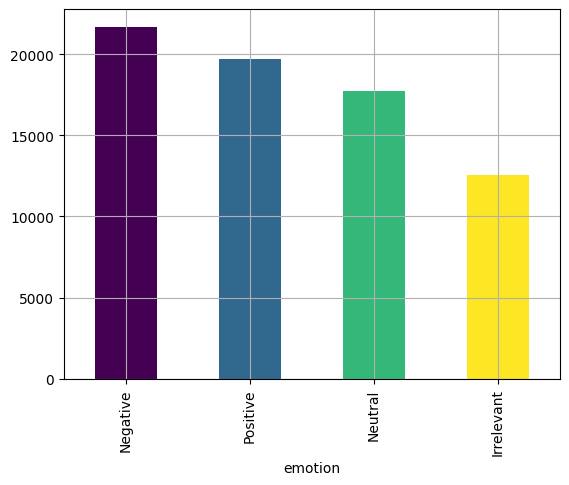

In [80]:
sentiment_content=df['emotion'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)

<Axes: xlabel='brand'>

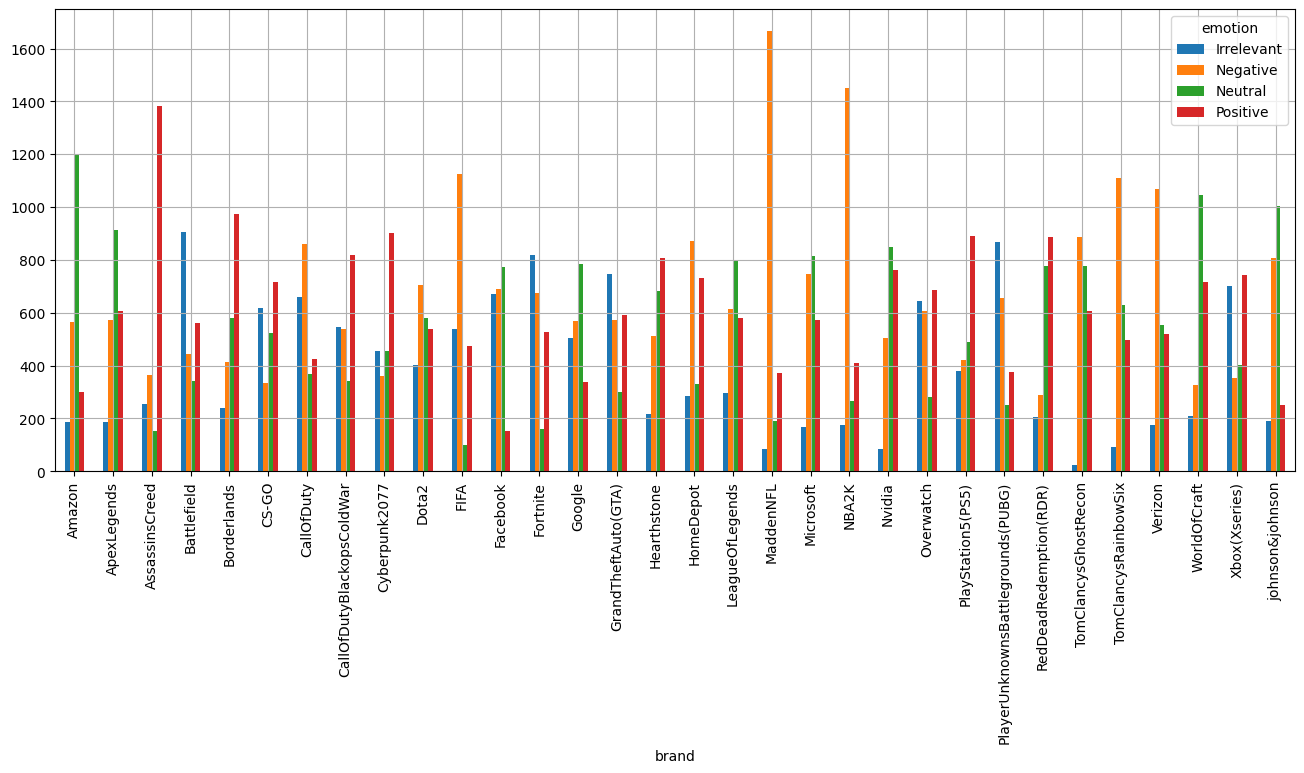

In [81]:
reactions_entities = pd.crosstab(df['brand'],df['emotion'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)

### Summary

- **we can see from the above plot the entities of the tweets are mostly equals.**
- **the above figure we can see the number of the negative reactions are above to 20000.**
- **the min number of the reactions are the number of the irrelevant reactions are less tan 15000.**
- **From the above figure the highest negative reactions in the MaddenNFL entity.**
- **The highest irrelevant reactions in the Battlefield entity.**
- **The highest neutral reactions in the Amazon entity.**
- **The highest positive reactions in the AssassinsCreed entity.**


#

### Model Training

In [34]:
X = df['tweet']
y = df['emotion']

In [36]:
encoder = LabelEncoder()

In [37]:
y = encoder.fit_transform(y)

In [39]:
X_train , X_test, y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [40]:
RandomForestClassifier = RandomForestClassifier()
pipeline = Pipeline(steps = [
    ('TfidfVectorizer' , TfidfVectorizer()),
    ('radnomforest' , RandomForestClassifier)
])

In [43]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('TfidfVectorizer', TfidfVectorizer()),
                ('radnomforest', RandomForestClassifier())])

In [44]:
y_pred = pipeline.predict(X_test)
y_pred

array([3, 2, 3, ..., 1, 0, 2])

### Evaluate pipeline

In [45]:
pipeline.score(X_test , y_test)

0.8991952365446342

In [46]:
from sklearn.metrics import confusion_matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred)
print(conf_matrix_nb)

[[3154  194  102  354]
 [  47 6028  106  339]
 [  39  205 4655  407]
 [  45  201  128 5493]]


In [47]:
from sklearn.metrics import classification_report
classification_re = classification_report(y_test, y_pred)
print(classification_re)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3804
           1       0.91      0.92      0.92      6520
           2       0.93      0.88      0.90      5306
           3       0.83      0.94      0.88      5867

    accuracy                           0.90     21497
   macro avg       0.91      0.89      0.90     21497
weighted avg       0.90      0.90      0.90     21497



### Exporting Model 

In [ ]:
import joblib
import pickle

# Save the pipeline (includes vectorizer, model, etc.)
joblib.dump(pipeline, 'model_compressed.joblib', compress=3)


# Save the LabelEncoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
